# Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

raw_data = pd.read_csv("./data/mlb_elo.csv")
#raw_data = raw_data.dropna()
raw_data['date']=pd.to_datetime(raw_data['date'], infer_datetime_format = True).map(lambda t : dt.datetime.toordinal(t))
raw_data

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,737362,2019,0,w,HOU,WSN,1599.542804,1584.363378,0.574617,0.425383,...,56.920649,61.723620,0.989236,27.776342,0.515172,0.484828,1587.973463,1583.382133,2,6
1,737361,2019,0,w,HOU,WSN,1605.069000,1578.837182,0.595209,0.404791,...,62.975093,60.272516,28.723451,21.776276,0.594638,0.405362,1591.026009,1580.329587,2,7
2,737359,2019,0,w,WSN,HOU,1584.005206,1599.900976,0.515546,0.484454,...,49.433198,66.891460,-29.811205,47.888341,0.373102,0.626898,1576.189971,1595.165625,1,7
3,737358,2019,0,w,WSN,HOU,1589.985555,1593.920627,0.538425,0.461575,...,56.003581,51.251046,0.823752,-24.893480,0.586974,0.413026,1578.722119,1592.633477,1,8
4,737357,2019,0,w,WSN,HOU,1593.827376,1590.078806,0.553044,0.446956,...,54.036365,57.096801,-9.053908,2.440389,0.526852,0.473148,1583.715416,1587.640180,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220005,683132,1871,0,NaN,TRO,ATL,1450.000000,1451.483000,0.532359,0.467641,...,NaN,NaN,NaN,NaN,0.522460,0.477540,1448.525000,1452.958000,5,9
220006,683131,1871,0,NaN,CHC,CL1,1450.000000,1451.943000,0.531700,0.468300,...,NaN,NaN,NaN,NaN,0.528402,0.471598,1451.256000,1450.687000,14,12
220007,683129,1871,0,NaN,RC1,CL1,1450.000000,1448.754000,0.536268,0.463732,...,NaN,NaN,NaN,NaN,0.532974,0.467026,1446.810000,1451.943000,4,12
220008,683128,1871,0,NaN,WS3,ATL,1450.000000,1450.000000,0.534484,0.465516,...,NaN,NaN,NaN,NaN,0.534484,0.465516,1448.517000,1451.483000,18,20


## Story
Let's try and see if we can tell as story using a team's seasonal performance.  Specifically we have great historical data.  Let's try and understand the perfromances of different franchises using their wins over time.

Because we have so many teams, we can focus on top and bottom performers.  To do this lets put the data into a format which gives yearly performace per team.  Let's make a column which holds the winner of a team.

In [2]:
raw_data["delta"] = raw_data["score1"] - raw_data["score2"]
raw_data['winner'] = raw_data.apply(lambda x: x.team1 if x.delta > 0 else x.team2, axis=1)
grp = raw_data.groupby(['winner', 'season'])

In [3]:
res = grp.count()['date'].rename(columns = 'wins')
res

winner  season
ANA     1961       71
        1962       86
        1963       70
        1964       82
        1965       75
                 ... 
WSN     2015       83
        2016       97
        2017       99
        2018       82
        2019      105
Length: 2887, dtype: int64

In [4]:
wins = res.swaplevel().unstack()
wins.tail()

winner,ANA,ARI,ATL,BAL,BFN,BL1,BL2,BOS,BR1,BR2,...,TRN,TRO,WOR,WS3,WS5,WS6,WS7,WS8,WS9,WSN
season,,,,,,,,,,,,,,,,,,,,,
2015,85.0,79.0,67.0,81.0,NaN,NaN,NaN,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0
2016,74.0,69.0,68.0,89.0,NaN,NaN,NaN,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0
2017,80.0,94.0,72.0,75.0,NaN,NaN,NaN,94.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0
2018,80.0,82.0,91.0,47.0,NaN,NaN,NaN,119.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
2019,72.0,85.0,99.0,54.0,NaN,NaN,NaN,84.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0


# Line graphs aren't going to cut it
When we throw 87 different teams with different franchise start and stop dates into one line chart we're going to have a tough time gathering any great information out of it (the colors do look cool though).

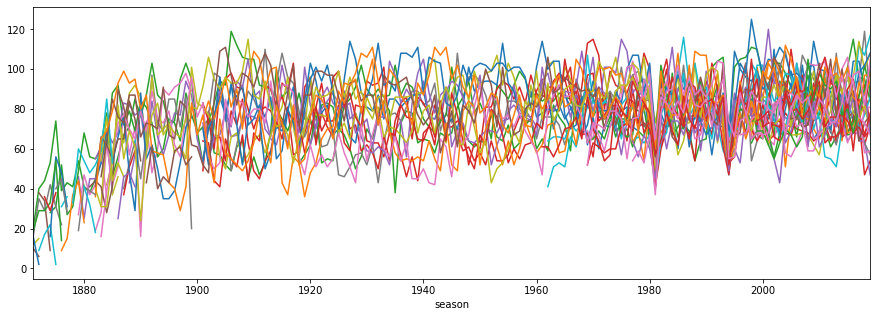

In [5]:
ax = plt.figure(figsize=(15,5)).add_subplot(111)
wins.plot(ax=ax).get_legend().remove() #Too much data with 87 different teams, lets grab the teams around recently.

# Get rid of teams that aren't around anymore
While this could be a great data point with interesting findings, we'll start to shape this dataset by going from 87 teams to the slightly more digestable 30.

In [6]:
for col in wins.columns:
    if np.isnan(wins.at[2019, col]): #Drop columns which have teams no longer playing
        wins.drop(col, axis = 1, inplace=True)

In [7]:
wins.tail() #Sharp looking data!

winner,ANA,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,...,PHI,PIT,SDP,SEA,SFG,STL,TBD,TEX,TOR,WSN
season,,,,,,,,,,,,,,,,,,,,,
2015,85.0,79.0,67.0,81.0,78.0,101.0,76.0,64.0,81.0,68.0,...,63.0,98.0,74.0,76.0,84.0,101.0,80.0,90.0,98.0,83.0
2016,74.0,69.0,68.0,89.0,93.0,115.0,78.0,68.0,104.0,75.0,...,71.0,78.0,68.0,86.0,89.0,86.0,68.0,95.0,94.0,97.0
2017,80.0,94.0,72.0,75.0,94.0,96.0,67.0,68.0,104.0,87.0,...,66.0,75.0,71.0,78.0,64.0,83.0,80.0,78.0,76.0,99.0
2018,80.0,82.0,91.0,47.0,119.0,95.0,62.0,67.0,91.0,92.0,...,80.0,82.0,66.0,89.0,73.0,88.0,90.0,67.0,73.0,82.0
2019,72.0,85.0,99.0,54.0,84.0,84.0,72.0,75.0,93.0,71.0,...,81.0,69.0,70.0,68.0,77.0,94.0,99.0,78.0,67.0,105.0


# Buuut there's still too much going on with this line chart
Let's try something less conventional to get some insight to our data

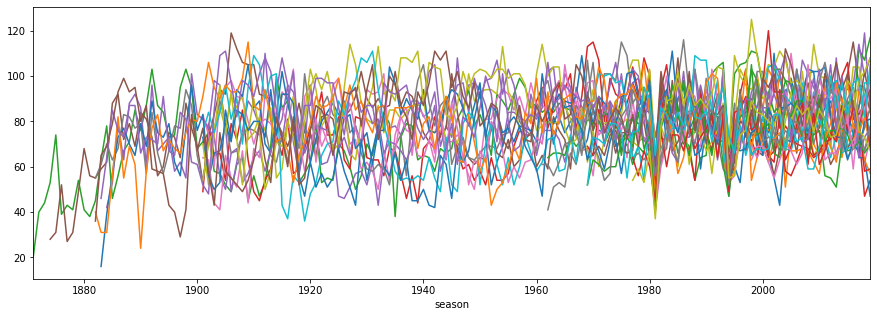

In [8]:
ax = plt.figure(figsize=(15,5)).add_subplot(111)
wins.plot(ax = ax).get_legend().remove()

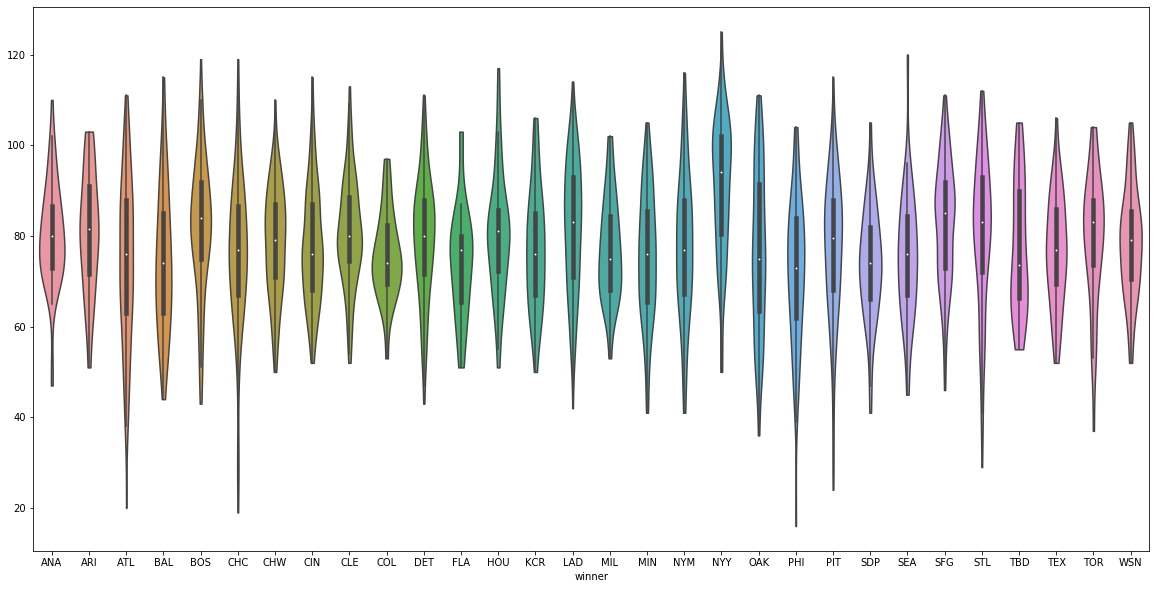

In [9]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(111)
sns.violinplot(data=wins,cut=0) #Too much data to really be helpful right now, lets lets try ordering it

# Better, but still confusing to really understand
Let's try adding some intuitiveness to this graph by sorting based on the median, this will group similar 'violins'

In [10]:
means = wins.median()
ord_wins = means.sort_values().index.to_list()
wins_sorted = wins[ord_wins]
wins_sorted

winner,PHI,TBD,COL,BAL,SDP,MIL,OAK,CIN,SEA,KCR,...,DET,CLE,HOU,ARI,TOR,STL,LAD,BOS,SFG,NYY
season,,,,,,,,,,,,,,,,,,,,,
1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,63.0,80.0,68.0,81.0,74.0,68.0,68.0,64.0,76.0,106.0,...,74.0,81.0,89.0,79.0,98.0,101.0,94.0,78.0,84.0,87.0
2016,71.0,68.0,75.0,89.0,68.0,73.0,69.0,68.0,86.0,81.0,...,86.0,104.0,84.0,69.0,94.0,86.0,96.0,93.0,89.0,84.0
2017,66.0,80.0,87.0,75.0,71.0,86.0,75.0,68.0,78.0,80.0,...,64.0,104.0,112.0,94.0,76.0,83.0,114.0,94.0,64.0,98.0


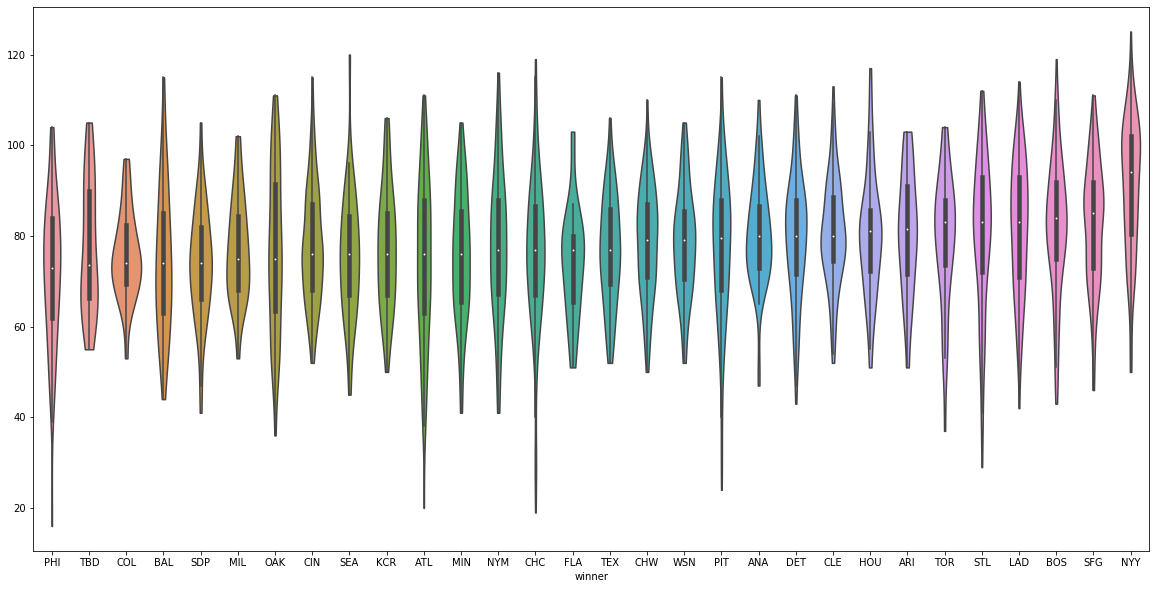

In [11]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(111)
sns.violinplot(data=wins_sorted,cut=0) # let's map yearly performance for the top 5 teams

# Great idea of spread, but we lose information over time
Let's try and work at this by going back to the line charts, but we'll use only the top teams and try to let each performance stand on it's own.  

By avoiding line intersections, it may be easier to commpare different performances.

<Figure size 1440x1440 with 0 Axes>

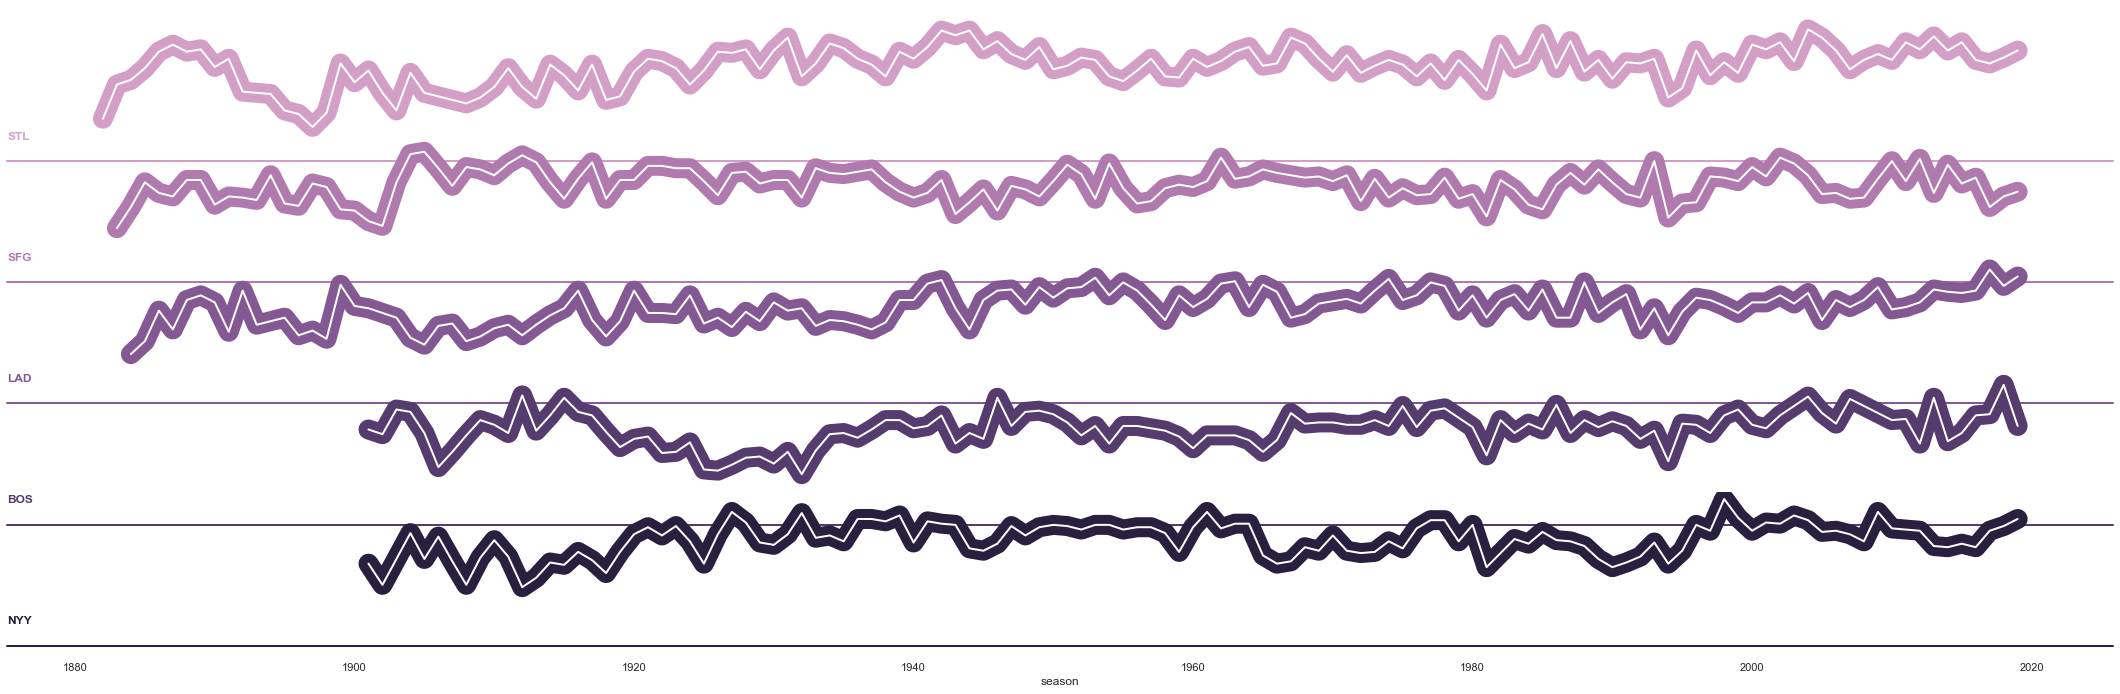

In [12]:
fig = plt.figure(figsize=(20,20))
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(5, rot=.25, light=.7)
g = sns.FacetGrid(wins_sorted.iloc[:,25:].stack().reset_index(), row="winner", hue="winner", aspect=15, height=2, palette=pal)

# Draw the densities in a few steps
g.map(sns.lineplot, 'season', 0, alpha=1, lw=20)
g.map(sns.lineplot, 'season', 0, color="w", lw=2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'season')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Closely examinging the data above...
You can spot some trends which some of the teams seem to follow.  This data doesn't look independent (which makes sense if you're playing a competitive sport!)

Let's try and get some more information about how teams perform relative to one another over time, using a heat map which encodes performance as heat will be a good way to compare general and season specific performance.

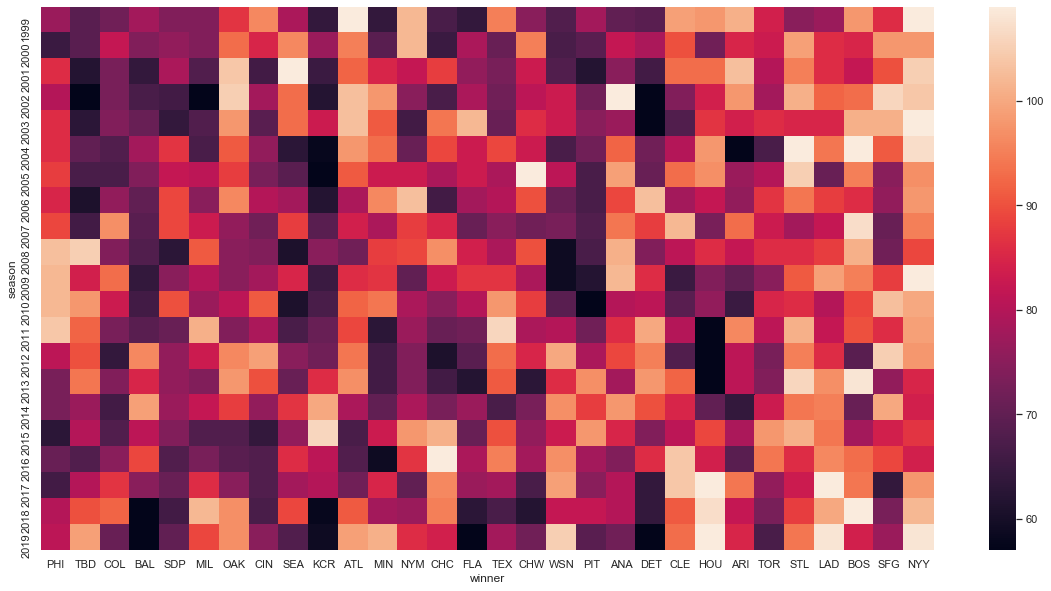

In [13]:
#Lets see if there's any correlation between which teams have winning seasons
fig = plt.figure(figsize=(20,10))
sns.heatmap(wins_sorted.loc[1999:], robust = True)

# Refining what's starting to work
The heat map above helps to show a general darker to lighter trend from left to right.  This is because of the general trend of the teams performances over the last 100 years.  To make the trend more pronounced, we can reorder data based on only the last 20 years.

In [14]:
means2 = wins[wins.index > 1999].mean()
ord_wins2 = means2.sort_values().index.to_list()
wins_sorted2 = wins[ord_wins2][wins.index > 1999]
wins_sorted2

winner,KCR,BAL,PIT,SDP,CIN,FLA,COL,DET,TBD,MIL,...,PHI,CLE,SFG,ANA,OAK,ATL,LAD,BOS,STL,NYY
season,,,,,,,,,,,,,,,,,,,,,
2000,77.0,74.0,69.0,76.0,85.0,79.0,82.0,79.0,69.0,74.0,...,65.0,90.0,98.0,82.0,93.0,95.0,86.0,85.0,99.0,98.0
2001,65.0,64.0,62.0,79.0,66.0,76.0,73.0,66.0,62.0,68.0,...,86.0,93.0,90.0,75.0,104.0,92.0,86.0,82.0,95.0,105.0
2002,62.0,67.0,72.0,66.0,78.0,79.0,73.0,55.0,55.0,56.0,...,80.0,74.0,106.0,110.0,105.0,103.0,92.0,93.0,101.0,104.0
2003,83.0,71.0,75.0,64.0,69.0,102.0,74.0,43.0,63.0,68.0,...,86.0,68.0,101.0,77.0,98.0,103.0,85.0,101.0,85.0,111.0
2004,58.0,78.0,72.0,87.0,76.0,83.0,68.0,72.0,70.0,67.0,...,86.0,80.0,91.0,92.0,91.0,98.0,94.0,109.0,112.0,107.0
2005,56.0,74.0,67.0,82.0,73.0,83.0,67.0,71.0,67.0,81.0,...,88.0,93.0,75.0,99.0,88.0,91.0,71.0,95.0,105.0,97.0
2006,62.0,70.0,67.0,89.0,80.0,78.0,76.0,103.0,61.0,75.0,...,85.0,78.0,76.0,89.0,96.0,79.0,88.0,86.0,94.0,98.0
2007,69.0,69.0,68.0,89.0,72.0,71.0,97.0,88.0,66.0,83.0,...,89.0,102.0,71.0,94.0,76.0,84.0,82.0,107.0,78.0,95.0
2008,75.0,68.0,67.0,63.0,74.0,84.0,74.0,74.0,105.0,91.0,...,103.0,81.0,72.0,101.0,75.0,72.0,88.0,101.0,86.0,89.0


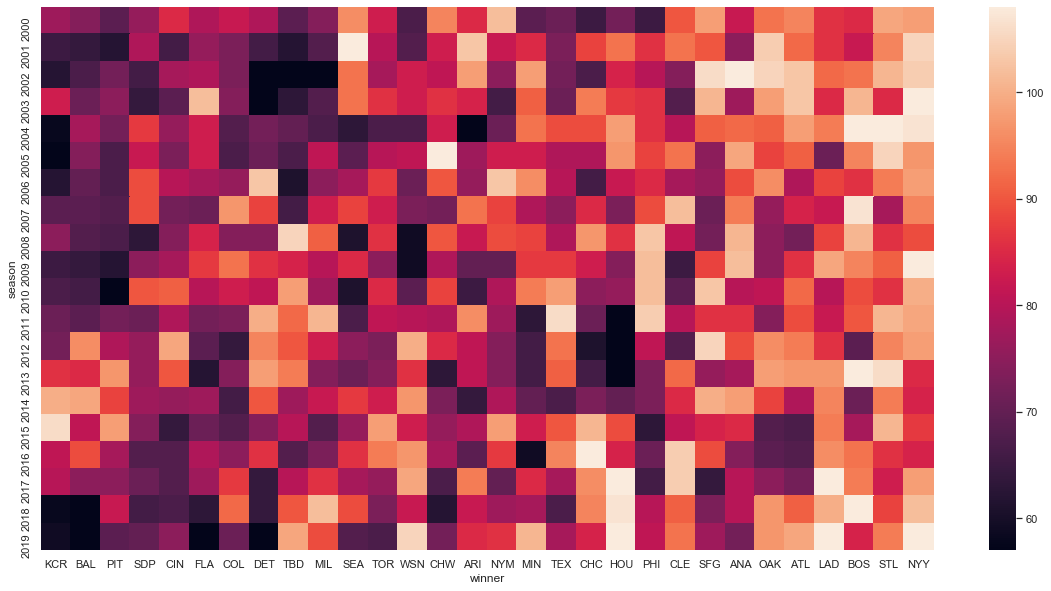

In [15]:
#Lets see if there's any correlation between which teams have winning seasons
fig = plt.figure(figsize=(20,10))
sns.heatmap(wins_sorted2.loc[1999:], robust = True)

# Conclusion
While this is an awesome dataset, finding good ways to visualize so many different data points across 30 teams was difficult.  Through aggregation and sorting the labeled categories, it did make the data more digestable and the graphics more meaningful.

Going forward, closer examination and exploration of teams before their francise closing would be interesting.  Further, a correlation matrix between team's performances would be very interesting (if you have an awesome team in your division, maybe the whole division performs marginally worse because of this).